# Analysis of NFL Lower Body Injuries and the Field/Turf Type They Occurred On.

### Import libraries read in and inspect data

In [34]:
#Import libraries
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Read in Injury data
injuries = pd.read_csv('InjuryRecord.csv')

In [3]:
#Read in Plays data
plays = pd.read_csv('PlayList.csv')

In [4]:
#Look at injuries data frame
injuries.head()

,PlayerKey,GameID,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42
0,39873,39873-4,39873-4-32,Knee,Synthetic,1,1,1,1
1,46074,46074-7,46074-7-26,Knee,Natural,1,1,0,0
2,36557,36557-1,36557-1-70,Ankle,Synthetic,1,1,1,1
3,46646,46646-3,46646-3-30,Ankle,Natural,1,0,0,0
4,43532,43532-5,43532-5-69,Ankle,Synthetic,1,1,1,1


In [5]:
#Look at plays data frame
plays.head()

,PlayerKey,GameID,PlayKey,RosterPosition,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup
0,26624,26624-1,26624-1-1,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,1,QB,QB
1,26624,26624-1,26624-1-2,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,2,QB,QB
2,26624,26624-1,26624-1-3,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,3,QB,QB
3,26624,26624-1,26624-1-4,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,4,QB,QB
4,26624,26624-1,26624-1-5,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,5,QB,QB


In [6]:
#Review info for injuries data frame
#We see missing data in the PlayKey field meaning we have injuries that we cannot tie to a specific play
#I will not be looking at this dataset at the play level so this is not a concern
injuries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PlayerKey  105 non-null    int64 
 1   GameID     105 non-null    object
 2   PlayKey    77 non-null     object
 3   BodyPart   105 non-null    object
 4   Surface    105 non-null    object
 5   DM_M1      105 non-null    int64 
 6   DM_M7      105 non-null    int64 
 7   DM_M28     105 non-null    int64 
 8   DM_M42     105 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 7.5+ KB


In [7]:
#Review info for plays data frame
#Again we see some missing weather data but again I will not need weather data for this analysis
plays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267005 entries, 0 to 267004
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PlayerKey       267005 non-null  int64 
 1   GameID          267005 non-null  object
 2   PlayKey         267005 non-null  object
 3   RosterPosition  267005 non-null  object
 4   PlayerDay       267005 non-null  int64 
 5   PlayerGame      267005 non-null  int64 
 6   StadiumType     250095 non-null  object
 7   FieldType       267005 non-null  object
 8   Temperature     267005 non-null  int64 
 9   Weather         248314 non-null  object
 10  PlayType        266638 non-null  object
 11  PlayerGamePlay  267005 non-null  int64 
 12  Position        267005 non-null  object
 13  PositionGroup   267005 non-null  object
dtypes: int64(5), object(9)
memory usage: 28.5+ MB


In [8]:
#Verifying RosterPosition values, these look good
plays['RosterPosition'].value_counts()

Linebacker           50129
Offensive Lineman    47413
Wide Receiver        43391
Safety               39387
Defensive Lineman    30588
Cornerback           28987
Running Back         11664
Tight End             7752
Quarterback           6986
Kicker                 708
Name: RosterPosition, dtype: int64

In [9]:
#Verifying StadiumType values. We won't be using this for our analysis but will clean it up to tidy the data anyway
plays['StadiumType'].value_counts()

Outdoor                   145032
Outdoors                   32956
Indoors                    22805
Dome                        9376
Retractable Roof            8914
Indoor                      6892
Open                        4124
Domed, closed               3076
Retr. Roof - Closed         2235
Retr. Roof-Closed           2015
Domed, open                 1779
Dome, closed                1059
Closed Dome                 1011
Domed                        985
Oudoor                       914
Domed, Open                  807
Ourdoor                      778
Outdoor Retr Roof-Open       601
Outddors                     595
Indoor, Roof Closed          547
Retr. Roof-Open              486
Retr. Roof - Open            486
Indoor, Open Roof            479
Bowl                         465
Retr. Roof Closed            414
Heinz Field                  389
Outdor                       356
Outside                      341
Cloudy                       178
Name: StadiumType, dtype: int64

In [10]:
#Reviewing FieldType values, these look good
plays['FieldType'].value_counts()

Natural      156902
Synthetic    110103
Name: FieldType, dtype: int64

In [11]:
#Reviewing BodyPart values, these look good
injuries['BodyPart'].value_counts()

Knee     48
Ankle    42
Foot      7
Toes      7
Heel      1
Name: BodyPart, dtype: int64

In [12]:
#Reviewing Surface values, these look good
injuries['Surface'].value_counts()

Synthetic    57
Natural      48
Name: Surface, dtype: int64

In [13]:
#there are many different vaslues for weather and even some missing data
#but we will not be using weather for this analysis so I will not be cleaning/tidying this field
plays['Weather'].value_counts()

Cloudy                                                                              60705
Sunny                                                                               51728
Partly Cloudy                                                                       28463
Clear                                                                               25923
Mostly Cloudy                                                                       11176
                                                                                    ...  
30% Chance of Rain                                                                    354
Partly Clouidy                                                                        302
Coudy                                                                                 278
Cloudy with periods of rain, thunder possible. Winds shifting to WNW, 10-20 mph.      246
Party Cloudy                                                                          230
Name: Weat

### Clean and Tidy Data

In [14]:
#Tidy StadiumType categories(Outdoor). Verified Heinz Field is an outdoor stadium
for i in plays['StadiumType']:
    if i == 'Outdoors' or i == 'Outdor' or i == 'Outside' or i == 'Outddors' or i == 'Outdoor Retr Roof-Open' or i == 'Ourdoor' or i == 'Oudoor' or i == 'Domed, open' or i == 'Open' or i == 'Retr. Roof-Open' or i =='Retr. Roof - Open' or i == 'Domed, Open' or i =='Heinz Field':
        plays['StadiumType'].replace(i, 'Outdoor', inplace = True)

In [15]:
#Tidy StadiumType categories(Indoor)
for i in plays['StadiumType']:
    if i == 'Indoors' or i == 'Dome' or i == 'Domed, closed' or i == 'Retr. Roof - Closed' or i == 'Retr. Roof-Closed' or i == 'Dome, closed' or i == 'Closed Dome' or i == 'Domed' or i == 'Indoor, Roof Closed' or i == 'Indoor, Open Roof' or i == 'Retr. Roof Closed':
        plays['StadiumType'].replace(i, 'Indoor', inplace = True)

In [16]:
#Tidy StadiumType categories(Unknown). Unable to determine for sure if Retractable Roof, Bowl, and Cloudy are actually Indoor or Outdoor so marking as Unknown
for i in plays['StadiumType']:
    if i == 'Retractable Roof' or i == 'Bowl' or i == 'Cloudy':
        plays['StadiumType'].replace(i, 'Unknown', inplace = True)

In [17]:
#Reviewing changes
plays['StadiumType'].value_counts()

Outdoor    189644
Indoor      50894
Unknown      9557
Name: StadiumType, dtype: int64

### Prepare data for join

In [18]:
#Creating a new plays dataframe with only the columns I will need to join with the injuries data frame for analysis
#Droping duplicates from the new data frame
plays = plays[['PlayerKey','GameID', 'StadiumType', 'FieldType', 'RosterPosition']].drop_duplicates().reset_index().drop(columns=['index'])

In [19]:
#Verifying new dataframe
plays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5712 entries, 0 to 5711
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   PlayerKey       5712 non-null   int64 
 1   GameID          5712 non-null   object
 2   StadiumType     5362 non-null   object
 3   FieldType       5712 non-null   object
 4   RosterPosition  5712 non-null   object
dtypes: int64(1), object(4)
memory usage: 223.2+ KB


In [20]:
#Dropping uneeded column from injuries dataframe
injuries.drop(columns = ['PlayKey'], inplace=True)

### Joining Data Frames for Analysis

In [21]:
#Joining plays and injuries data from on GameID
injuries_by_game = injuries.set_index('GameID').join(plays.set_index('GameID'), how = 'outer', lsuffix = 'injuries', rsuffix = 'plays')

In [22]:
#Verifying new dataframe
injuries_by_game.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5713 entries, 26624-1 to 47888-9
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PlayerKeyinjuries  105 non-null    float64
 1   BodyPart           105 non-null    object 
 2   Surface            105 non-null    object 
 3   DM_M1              105 non-null    float64
 4   DM_M7              105 non-null    float64
 5   DM_M28             105 non-null    float64
 6   DM_M42             105 non-null    float64
 7   PlayerKeyplays     5713 non-null   int64  
 8   StadiumType        5363 non-null   object 
 9   FieldType          5713 non-null   object 
 10  RosterPosition     5713 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 535.6+ KB


In [23]:
#Filling the nans in the missing days fields with 0's
injuries_by_game['DM_M1'] = injuries_by_game['DM_M1'].fillna(0).astype(int)
injuries_by_game['DM_M7'] = injuries_by_game['DM_M7'].fillna(0).astype(int)
injuries_by_game['DM_M28'] = injuries_by_game['DM_M28'].fillna(0).astype(int)
injuries_by_game['DM_M42'] = injuries_by_game['DM_M42'].fillna(0).astype(int)

In [24]:
#Creating new column in new dataframe to signify which players were injured
injuries_by_game['Injured'] = injuries_by_game['DM_M1']

In [25]:
#Replacing blanks with nans
injuries_by_game.replace(r'^\s*$', np.nan, regex=True)

,PlayerKeyinjuries,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42,PlayerKeyplays,StadiumType,FieldType,RosterPosition,Injured
GameID,,,,,,,,,,,,
26624-1,NaN,NaN,NaN,0,0,0,0,26624,Outdoor,Synthetic,Quarterback,0
26624-10,NaN,NaN,NaN,0,0,0,0,26624,Outdoor,Natural,Quarterback,0
26624-11,NaN,NaN,NaN,0,0,0,0,26624,Outdoor,Synthetic,Quarterback,0
26624-12,NaN,NaN,NaN,0,0,0,0,26624,Outdoor,Synthetic,Quarterback,0
26624-13,NaN,NaN,NaN,0,0,0,0,26624,Outdoor,Natural,Quarterback,0
...,...,...,...,...,...,...,...,...,...,...,...,...
47888-5,NaN,NaN,NaN,0,0,0,0,47888,Outdoor,Synthetic,Cornerback,0
47888-6,NaN,NaN,NaN,0,0,0,0,47888,Outdoor,Synthetic,Cornerback,0
47888-7,NaN,NaN,NaN,0,0,0,0,47888,Outdoor,Natural,Cornerback,0


In [26]:
#Writing new dataframe to CSV
injuries_by_game.to_csv('injuries by game.csv')

***At this point I exported the cleaned and joined data to use in QlikSense a data visualization application. Below you will see the visualizations I created in qliksense by analyzing the joined dataframe. I wanted to first get a brief look at the data specifically needed for the hypothesis of this project. Below you can see that in this data set 58% of games were  played on natural turf. If our null hypothesis, Probability of injury on natural turf is less than or equal to injury on sythentic turf, is correct then we should expect to see more injuries on natural turf in this data set just due to the majority of games being played on natural turf. What we see instead is that we still have more injuries on sythetic turf. This is not conclusive, but bodes in favor of our alternative hypothesis.***

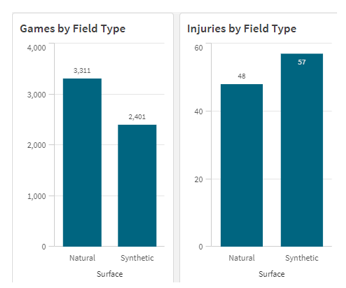

***I then created some additional visualizations that provides some interesting insights into this data set, even if they don't directly relate to the hypothsis testing I am doing in this project. The first visualization you see below is the breakdown of injuries by body part. As you can see the knees and ankles appear to be the most susceptible to injury in this dataset/ With foot, toes and heel all accounting for much lower numbers.***

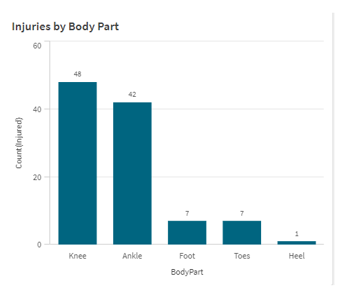

***I created another visualization to shows injuries by roster position. Here we can see that Lineback and Wide Receiver are the most often injured among this data set, with Safety and Cornerback also being fairly high. There are smaller numbers of injuries in the Defensive Line, Running Back, Offensive Line and Tight End positions.***

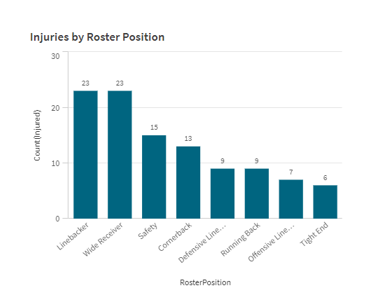

***The last visualization I created in QlikSense is looking at the number of days players missed due to injury. As you can see the majority of players injured missed 8-28 days. Interestingly there were an equal number of injured players that missed 1-7 days and more than 42 days. Another interesting note is how small the group is that missed 29-42 days. We could speculate that perhaps some of the foot/ankle/toe inuries heal quickly, while perhaps the knee and leg injuries could take longer, thus leaving a lesser amount of players in the middling days missed area.***

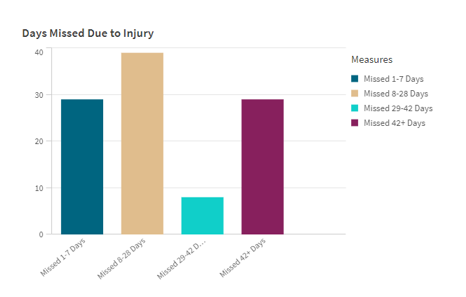

### Preparing data for Chi Square testing

***Below I prepare the data for Chi Square testing. As I have 2 categorical varibales, turf type and injured status, this is an apporpriate method to get a p-value to determine the statistical significance which will tell me if my null hypothesis is correct or if it should be rejected in favor of the alternative hypothesis.***


***I first gather the data to see the probability of injuy on each turf type. Using this data we can in fact see that the probability for injury is quite a bit higher on sythentic turf. That doesn't directly confirm our null hypothesis though. In order to do that we will need to prove that data is statistically significant. We can do that using a Chi Square Test.***

In [27]:
#Series showing the mean of injuries by turf type
injury = injuries_by_game[['FieldType', 'Injured']].groupby('FieldType').mean()['Injured']
injury

FieldType
Natural      0.014497
Synthetic    0.023730
Name: Injured, dtype: float64

***Before running the Chi Square Test, I created a a basic contingency table to visualize the data the Chi Square test will use. From this contingency table we could manually calculate the p-value of the data. Fortuntaely python has a function we can use to automatically calculate the p-value for us.***

In [28]:
contigency = pd.crosstab(injuries_by_game['FieldType'], injuries_by_game['Injured']) 
contigency

Injured,0,1
FieldType,,
Natural,3263,48
Synthetic,2345,57


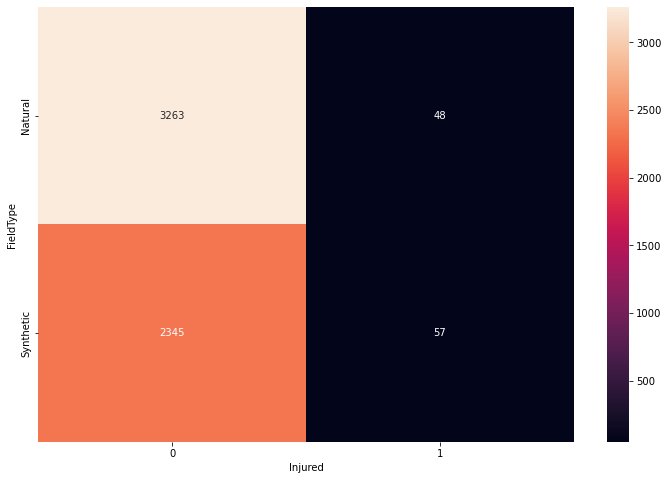

In [40]:
plt.figure(figsize=(12,8)) 
sns.heatmap(contigency, annot=True, fmt='g');

***Below I run the Chi Square Test on my contigency table. We can see that the p-value of this data is 0.014(rounded up). With our alpha being 0.05 we would need our p-value to be above 0.05 to accept our null hypothesis, Probability of injury on natural turf is less than or equal to injury on sythentic turf. Since the p-value is lower than 0.05 we instead must reject the null hypothesis in favor of the alternative, Probability of injury on sythetic turf is greater than injury on natural turf. This p-value also shows us that our data is statistically significant to this hypothesis test.***

In [33]:
# Chi-square test of independence. 
c, p, dof, expected = chi2_contingency(contigency) # Print the p-value
print('The p-value is: {}'.format(p))

The p-value is: 0.013701704005366692
